In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras import layers, losses, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import tensorflow as tf
import keras
#import tensorflow as tf

In [2]:
with open('/content/drive/MyDrive/mHealth/project2/ascending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    asc_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/dancing.csv', 'r', encoding='utf-8-sig') as f: 
    dance_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/descending stairs.csv', 'r', encoding='utf-8-sig') as f: 
    des_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/jumping.csv', 'r', encoding='utf-8-sig') as f: 
    jump_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/sitting.csv', 'r', encoding='utf-8-sig') as f: 
    sit_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/standing.csv', 'r', encoding='utf-8-sig') as f: 
    stand_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/walking.csv', 'r', encoding='utf-8-sig') as f: 
    walk_data = np.genfromtxt(f,delimiter = ',')


with open('/content/drive/MyDrive/mHealth/project2/eating.csv', 'r', encoding='utf-8-sig') as f: 
    eat_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups on floor.csv', 'r', encoding='utf-8-sig') as f: 
    pushf_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/pushups against wall.csv', 'r', encoding='utf-8-sig') as f: 
    pushg_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/working on laptop.csv', 'r', encoding='utf-8-sig') as f: 
    laptop_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/running.csv', 'r', encoding='utf-8-sig') as f: 
    run_data = np.genfromtxt(f,delimiter = ',')


In [3]:
full_data = np.concatenate([asc_data,dance_data,des_data,jump_data,sit_data,stand_data,walk_data,eat_data,pushf_data,pushg_data,laptop_data,run_data],axis = 0)
full_data.shape
minimum = np.min(full_data,axis = 0)
maximum = np.max(full_data,axis = 0)
print(minimum)
print(maximum)

[  -3.79   -2.04   -1.69 -295.84 -150.57 -186.71]
[  0.55   2.48   1.96 220.03 183.29 113.1 ]


In [4]:


def normalize_data(data):
    minimum = np.min(data,axis = 0)#np.array([-4.0,-4.0,-4.0,-2000.0,-2000.0,-2000.0])#np.min(data,axis = 0)
    maximum = np.max(data,axis = 0)#np.array([4.0,4.0,4.0,2000.0,2000.0,2000.0])#np.max(data,axis = 0)
    #print('minimum')
    #print(minimum)
    #print('maximum')
    #print(maximum)
    norm_data = (data - minimum) / (maximum - minimum)
    return norm_data, minimum, maximum

In [5]:
asc_data,min1, max1  = normalize_data(asc_data)
dance_data,min2, max2 = normalize_data(dance_data)
des_data,min3, max3 = normalize_data(des_data)
jump_data,min4, max4 = normalize_data(jump_data)
sit_data,min5, max5 = normalize_data(sit_data)
stand_data,min6, max6 = normalize_data(stand_data)
walk_data,min7, max7 = normalize_data(walk_data)


eat_data,min8, max8 = normalize_data(eat_data)
pushf_data,min9, max9 = normalize_data(pushf_data)
pushg_data,min10, max10 = normalize_data(pushg_data)
laptop_data,min11, max11= normalize_data(laptop_data)
run_data,min12, max12 = normalize_data(run_data)

print((min1+min2+min3+min4+min5+min6+min7+min8+min9+min10+min11+min12)/12.0)
print((max1+max2+max3+max4+max5+max6+max7+max8+max9+max10+max11+max12)/12.0)

[  -1.63166667   -0.57916667   -0.3725     -117.25333333  -66.84833333
  -73.76583333]
[-8.08333333e-02  1.01916667e+00  1.02333333e+00  1.05265833e+02
  9.29066667e+01  5.77300000e+01]


In [6]:
def get_features(data):
    final_data = []
    for i in range(data.shape[0]):
        example = []
        for j in range(data.shape[2]):
            segment = data[i,:,j]
            example.extend(segment)
        final_data.append(example)
    return np.array(final_data)

In [7]:
def get_segments(data):
    #here data is expected to be of 14280 samples (or multiples of 238) as I am segmenting 2 seconds of sensor data for one example
    segments = np.split(data,np.arange(0,14280,357)[1:])
    return np.array(segments)


In [8]:
asc_data_segments = get_segments(asc_data)
des_data_segments = get_segments(des_data)
dance_data_segments = get_segments(dance_data)
jump_data_segments = get_segments(jump_data)
sit_data_segments = get_segments(sit_data)
stand_data_segments = get_segments(stand_data)
walk_data_segments = get_segments(walk_data)

eat_data_segments = get_segments(eat_data)
pushf_data_segments = get_segments(pushf_data)
pushg_data_segments = get_segments(pushg_data)
laptop_data_segments = get_segments(laptop_data)
run_data_segments = get_segments(run_data)

print(asc_data_segments.shape)

(40, 357, 6)


In [9]:
asc_data_features = get_features(asc_data_segments)
des_data_features = get_features(des_data_segments)
dance_data_features = get_features(dance_data_segments)
jump_data_features = get_features(jump_data_segments)
sit_data_features = get_features(sit_data_segments)
stand_data_features = get_features(stand_data_segments)
walk_data_features = get_features(walk_data_segments)

eat_data_features = get_features(eat_data_segments)
pushf_data_features = get_features(pushf_data_segments)
pushg_data_features = get_features(pushg_data_segments)
laptop_data_features = get_features(laptop_data_segments)
run_data_features = get_features(run_data_segments)

print(asc_data_features.shape)

(40, 2142)


In [10]:
#preparing train, validation and test data and labels
activities = ['asc_data','des_data','dance_data','jump_data','sit_data','stand_data','walk_data','eat_data','pushf_data','pushg_data','laptop_data','run_data']
activity_length = [len(asc_data_features),len(des_data_features),len(dance_data_features),len(jump_data_features),len(sit_data_features),len(stand_data_features),len(walk_data_features),
                   len(eat_data_features),len(pushf_data_features),len(pushg_data_features),len(laptop_data_features),len(run_data_features)]
activity_id = np.arange(len(activities))
labels = []
for i,id in enumerate(activity_id):
    labels.extend(np.full(activity_length[i],id))
labels = np.array(labels)
full_features = np.concatenate([asc_data_features,des_data_features,dance_data_features,jump_data_features,sit_data_features,stand_data_features,walk_data_features,
                                eat_data_features,pushf_data_features,pushg_data_features,laptop_data_features,run_data_features],axis = 0)
x_train,x_test,y_train,y_test = train_test_split(full_features,labels,test_size = 0.2,random_state = 2, shuffle = True)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.2,random_state = 2, shuffle = True)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)



(307, 2142)
(77, 2142)
(96, 2142)
(307,)
(77,)
(96,)


In [11]:
class activity_detector(Model):
  def __init__(self):
    super(activity_detector, self).__init__()
    self.forward_pass = Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(12, activation="softmax")])
    
  def call(self, x):
    fp = self.forward_pass(x)
    return fp


In [12]:
model = activity_detector()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train,epochs=50,batch_size=10,validation_data=(x_valid, y_valid),shuffle=True)

Epoch 1/50
31/31 [==============================] - 2s 18ms/step - loss: 2.5262 - accuracy: 0.0684 - val_loss: 2.4795 - val_accuracy: 0.0779
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 2.4618 - accuracy: 0.0977 - val_loss: 2.4477 - val_accuracy: 0.0649
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 2.3658 - accuracy: 0.1857 - val_loss: 2.2804 - val_accuracy: 0.2078
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 2.1666 - accuracy: 0.2541 - val_loss: 2.1399 - val_accuracy: 0.2078
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 1.9412 - accuracy: 0.3094 - val_loss: 1.9198 - val_accuracy: 0.3506
Epoch 6/50
31/31 [==============================] - 0s 9ms/step - loss: 1.7062 - accuracy: 0.4332 - val_loss: 1.6798 - val_accuracy: 0.2597
Epoch 7/50
31/31 [==============================] - 0s 6ms/step - loss: 1.4979 - accuracy: 0.5407 - val_loss: 1.5255 - val_accuracy: 0.4156
Epoch 8/50
31/31 [=

Plotting loss for each epoch

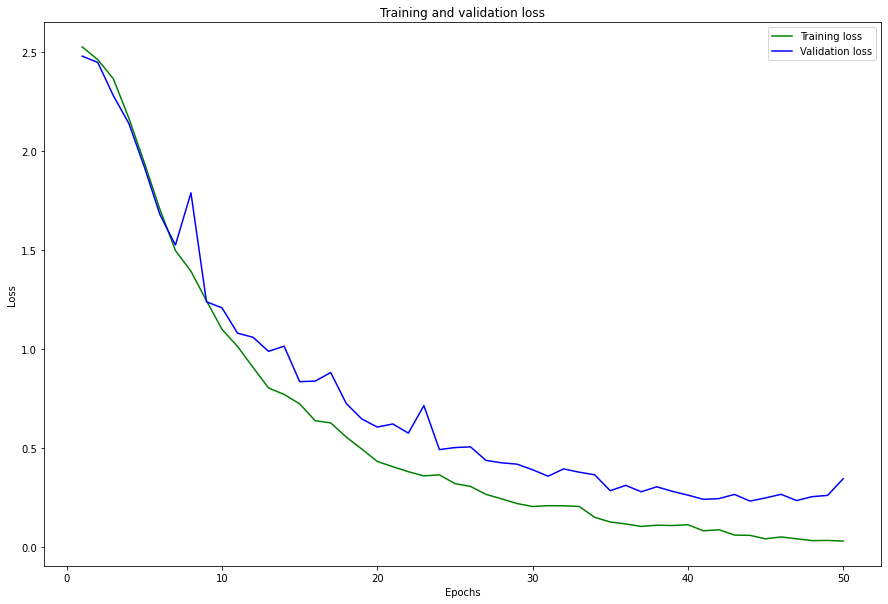

In [13]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting accuracy for each epoch

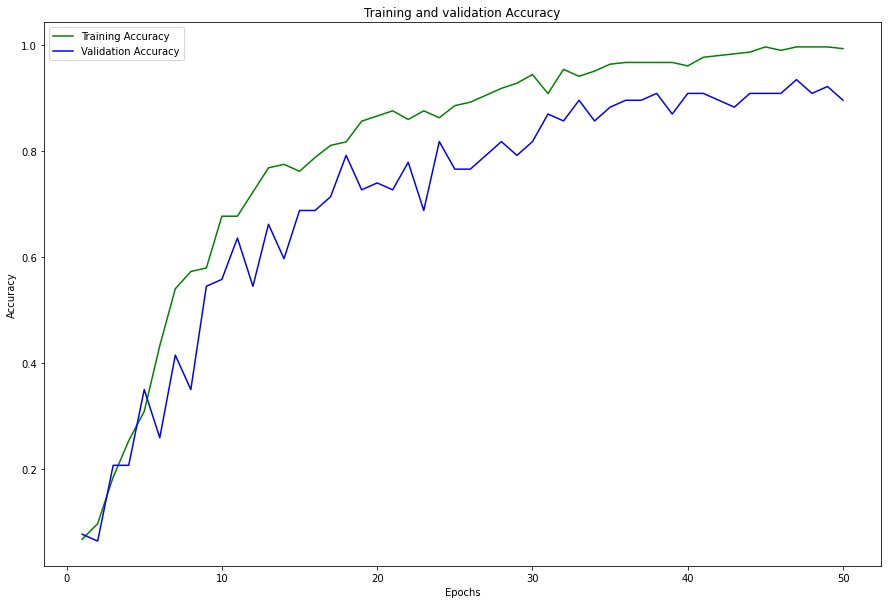

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions = predictions.astype(int)
accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test,predictions,average = 'weighted')
recall = recall_score(y_test,predictions,average = 'weighted')
f1 = f1_score(y_test,predictions,average = 'weighted')
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = activities
conf_mat.index = activities
print('accuracy:', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f1_score: ', f1)
print('Confusion Matrix: \n', conf_mat)

accuracy: 0.8125
Precision:  0.8691385582010582
Recall:  0.8125
f1_score:  0.7804366685945633
Confusion Matrix: 
              asc_data  des_data  dance_data  jump_data  sit_data  stand_data  \
asc_data            1         7           0          1         0           0   
des_data            0         5           4          0         0           0   
dance_data          0         0           5          0         0           0   
jump_data           0         0           0          6         0           0   
sit_data            0         0           0          0         9           0   
stand_data          0         0           0          0         0           7   
walk_data           0         0           0          0         0           0   
eat_data            0         0           0          0         0           0   
pushf_data          0         0           0          0         0           0   
pushg_data          0         0           0          0         0           0   
laptop

In [16]:
#code to convert deployable model - code is referred from IMU TinyML mheath note book used in class discussions
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)


# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
quant_model = converter.convert()
open("quantized.tflite", "wb").write(quant_model)


import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("quantized.tflite")
print("Model is %d bytes" % quantized_model_size)

INFO:tensorflow:Assets written to: /tmp/tmp7lx3khwe/assets


INFO:tensorflow:Assets written to: /tmp/tmpj045cihf/assets


INFO:tensorflow:Assets written to: /tmp/tmpj045cihf/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Model is 565180 bytes
Model is 144344 bytes


In [17]:
!apt-get install xxd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xxd is already the newest version (2:8.0.1453-1ubuntu1.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [18]:
!echo "const unsigned char model[] = {" >model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 3,485,312 bytes.


In [19]:
!echo "const unsigned char model[] = {" >model1.h
!cat quantized.tflite | xxd -i      >> model1.h
!echo "};"                              >> model1.h

import os
model_h_size = os.path.getsize("model1.h")
print(f"Header file, model1.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model1.h, is 890,156 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
